In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kununu_competitors.csv')

In [3]:
def compare_scores(df, company1, company2, score_col):
    '''
        Compare the salary scores between two companies using statistical tests to determine if there is a significant difference.
        
        **Null Hypothesis (H0)**:
    - For the t-test: The null hypothesis is that the mean scores for `company1` and `company2` are equal (i.e., there is no significant difference in salary scores).
    - For the Mann-Whitney U test: The null hypothesis is that the distributions of scores for `company1` and `company2` are identical.
    '''
    company1_scores = df[df['company_name_short'] == company1][score_col]
    company2_scores = df[df['company_name_short'] == company2][score_col]
    
    # 1. Shapiro-Wilk Test for Normality
    stat1, p1 = stats.shapiro(company1_scores)
    stat2, p2 = stats.shapiro(company2_scores)
    
    print(f"{company1} Salary - Shapiro-Wilk Test: Statistics={stat1}, p={p1}")
    print(f"{company2} Salary - Shapiro-Wilk Test: Statistics={stat2}, p={p2}")
    
    # 检查是否为正态分布
    alpha = 0.05
    if p1 > alpha and p2 > alpha:
        print("Both samples are normally distributed, using T-test.")
        
        # 2. Independent T-Test
        t_stat, t_p_value = stats.ttest_ind(company1_scores, company2_scores)
        print(f"T-Test Results: T-statistic = {t_stat}, p-value = {t_p_value}")
        
        if t_p_value < alpha:
            print("Reject the null hypothesis - there is a significant difference.")
        else:
            print("Fail to reject the null hypothesis - no significant difference.")
    
    else:
        print("At least one sample is not normally distributed, using Mann-Whitney U Test.")
        
        # 3. Mann-Whitney U Test
        u_stat, u_p_value = stats.mannwhitneyu(company1_scores, company2_scores)
        print(f"Mann-Whitney U Test Results: U-statistic = {u_stat}, p-value = {u_p_value}")
        
        if u_p_value < alpha:
            print("Reject the null hypothesis - there is a significant difference.")
        else:
            print("Fail to reject the null hypothesis - no significant difference.")
    
    # 可视化数据的QQ图以检查正态性
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    stats.probplot(company1_scores, dist="norm", plot=plt)
    plt.title(f'QQ Plot for {company1} {score_col}')
    
    plt.subplot(1, 2, 2)
    stats.probplot(company2_scores, dist="norm", plot=plt)
    plt.title(f'QQ Plot for {company2} {score_col}')
    
    plt.show()




Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8599081039428711, p=4.706130357786225e-18
Bosch Salary - Shapiro-Wilk Test: Statistics=0.7763087153434753, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 643810.0, p-value = 6.729995674734854e-19
Reject the null hypothesis - there is a significant difference.


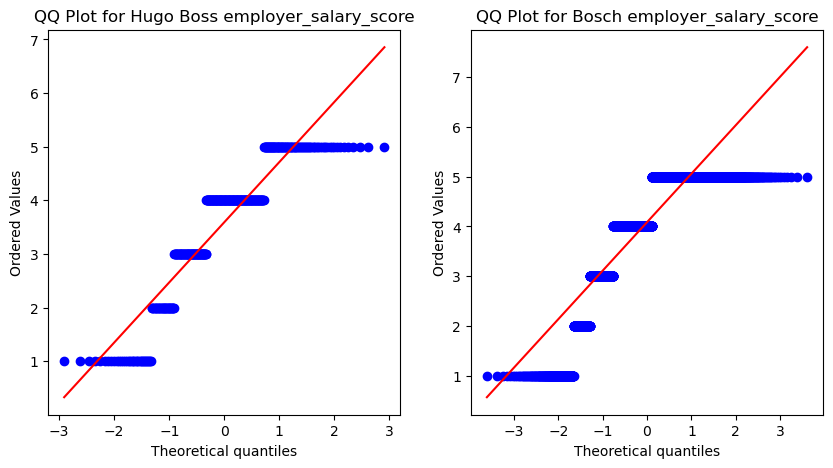

In [4]:
compare_scores(df, 'Hugo Boss', 'Bosch', 'employer_salary_score')

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8599081039428711, p=4.706130357786225e-18
Porsche Salary - Shapiro-Wilk Test: Statistics=0.7687265872955322, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 418361.5, p-value = 4.305132770474737e-16
Reject the null hypothesis - there is a significant difference.


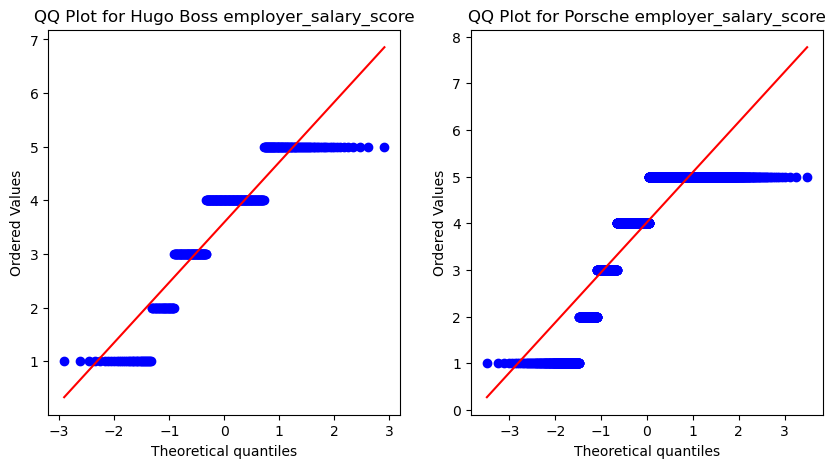

In [6]:
compare_scores(df, 'Hugo Boss', 'Porsche', 'employer_salary_score')

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8599081039428711, p=4.706130357786225e-18
Mercedes-Benz Salary - Shapiro-Wilk Test: Statistics=0.8159170746803284, p=3.893532311454824e-36
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 206809.5, p-value = 1.2921744061489207e-07
Reject the null hypothesis - there is a significant difference.


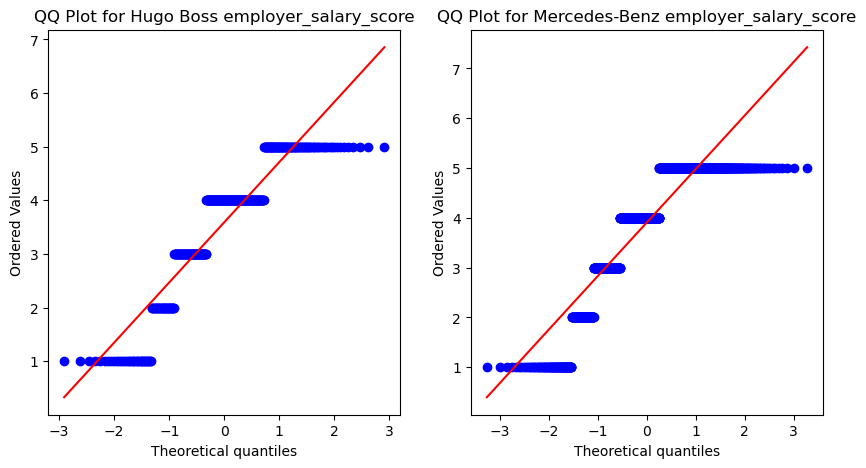

In [7]:
compare_scores(df, 'Hugo Boss', 'Mercedes-Benz', 'employer_salary_score')

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8599081039428711, p=4.706130357786225e-18
Adidas Salary - Shapiro-Wilk Test: Statistics=0.8712218999862671, p=1.883703512284918e-21
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 110635.5, p-value = 0.952212962410467
Fail to reject the null hypothesis - no significant difference.


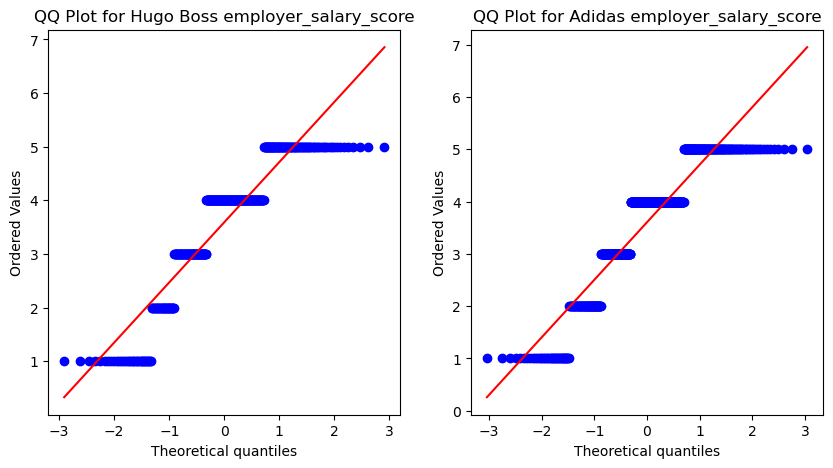

In [8]:
compare_scores(df, 'Hugo Boss', 'Adidas', 'employer_salary_score')

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8711384534835815, p=2.5910393749374225e-17
Bosch Salary - Shapiro-Wilk Test: Statistics=0.8452143669128418, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 772654.0, p-value = 0.00028756236990620495
Reject the null hypothesis - there is a significant difference.


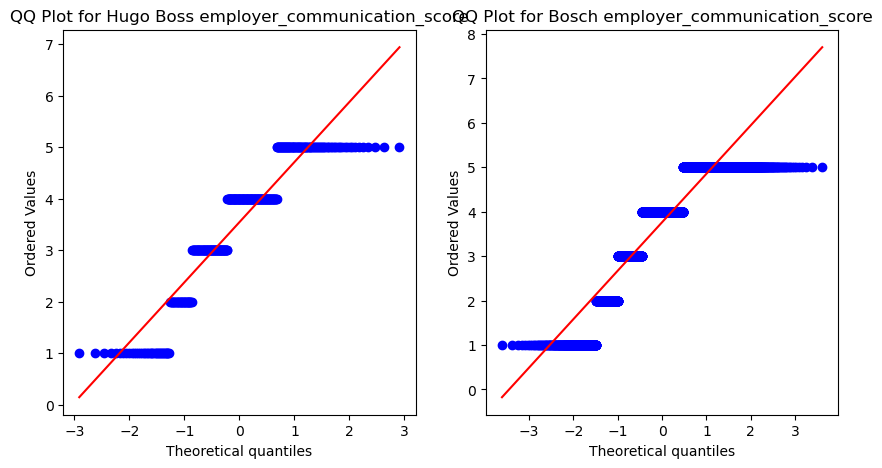

In [5]:
compare_scores(df, 'Hugo Boss', 'Bosch', 'employer_communication_score')

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7643433809280396, p=4.8078017703795654e-23
LVMH Salary - Shapiro-Wilk Test: Statistics=0.811985433101654, p=5.945866732304239e-08
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 15326.5, p-value = 0.023641182998052002
Reject the null hypothesis - there is a significant difference.


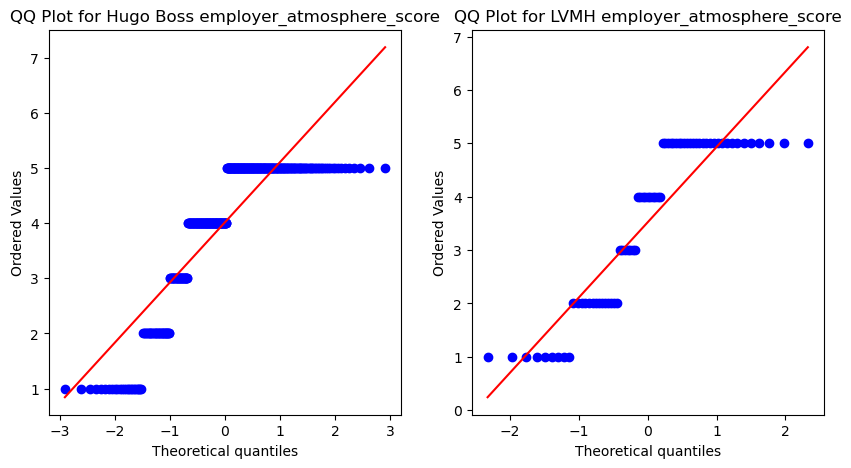

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8711384534835815, p=2.5910393749374225e-17
LVMH Salary - Shapiro-Wilk Test: Statistics=0.8366737365722656, p=3.0301964670798043e-07
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 13835.5, p-value = 0.5207006137405568
Fail to reject the null hypothesis - no significant difference.


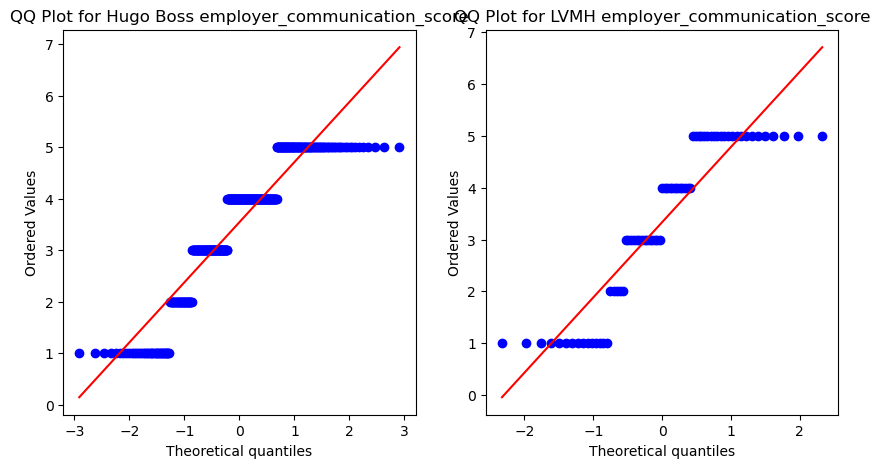

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8020877838134766, p=2.6916131995564825e-21
LVMH Salary - Shapiro-Wilk Test: Statistics=0.8121544718742371, p=6.009779696114492e-08
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 13563.5, p-value = 0.7113841713688464
Fail to reject the null hypothesis - no significant difference.


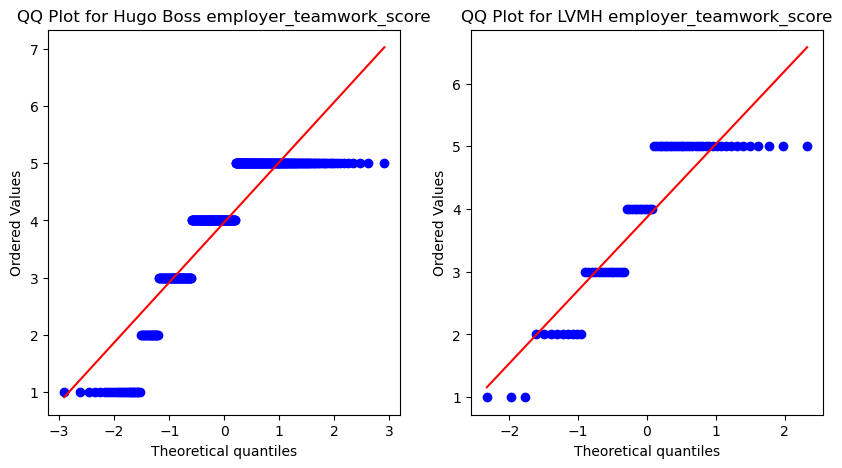

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7884693145751953, p=5.919580930777753e-22
LVMH Salary - Shapiro-Wilk Test: Statistics=0.8600218892097473, p=1.6270549849650706e-06
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 16525.0, p-value = 0.00045027925002808357
Reject the null hypothesis - there is a significant difference.


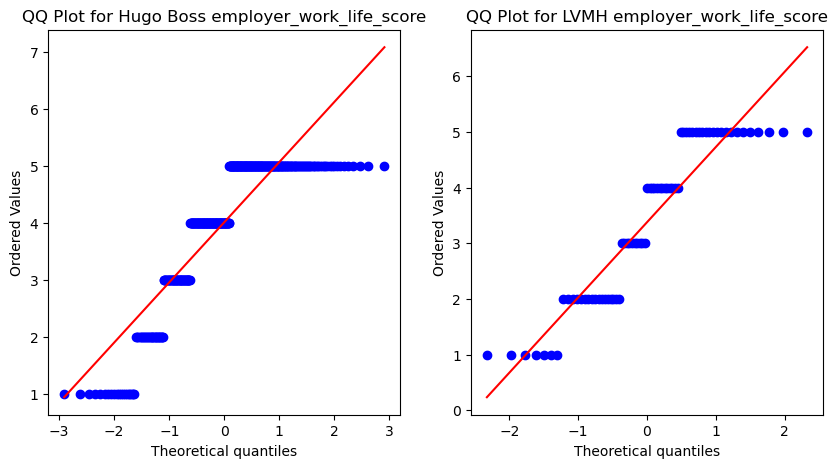

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8217376470565796, p=2.765989540153036e-20
LVMH Salary - Shapiro-Wilk Test: Statistics=0.8182497620582581, p=8.872865464581992e-08
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 14182.5, p-value = 0.31469008167149526
Fail to reject the null hypothesis - no significant difference.


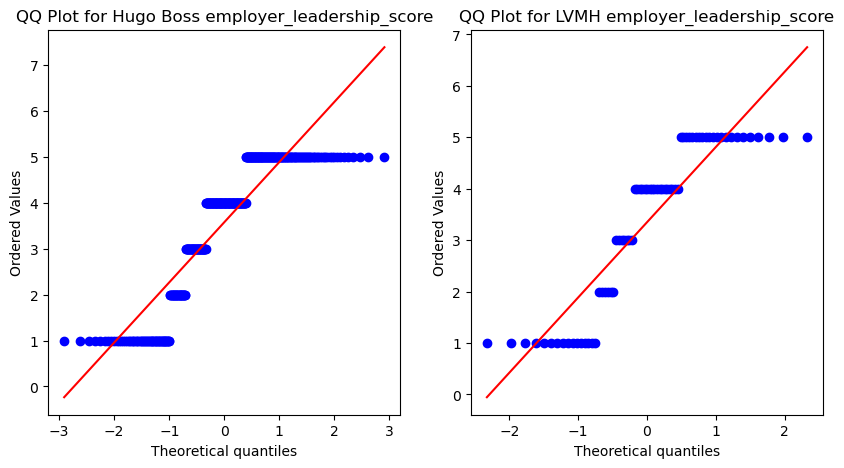

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7707819938659668, p=9.210945033195891e-23
LVMH Salary - Shapiro-Wilk Test: Statistics=0.8128603100776672, p=6.284621179020178e-08
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 15328.0, p-value = 0.022674430679092337
Reject the null hypothesis - there is a significant difference.


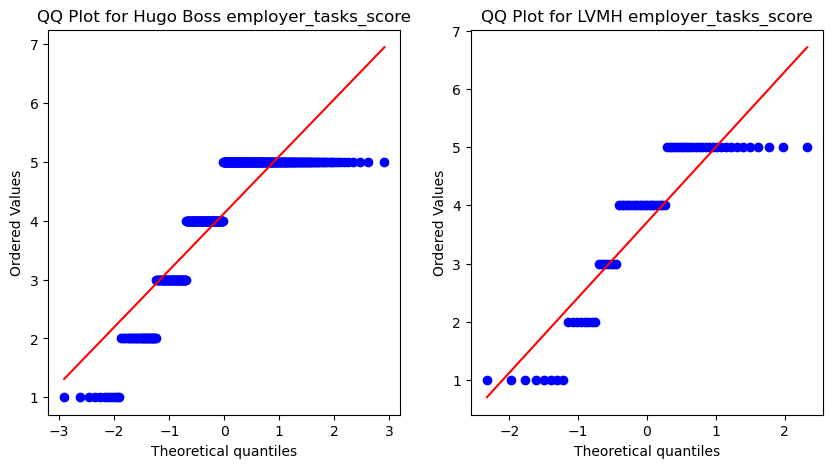

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7691415548324585, p=7.794634892470398e-23
LVMH Salary - Shapiro-Wilk Test: Statistics=0.7346487641334534, p=7.527645728977461e-10
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 13476.5, p-value = 0.7766542554597925
Fail to reject the null hypothesis - no significant difference.


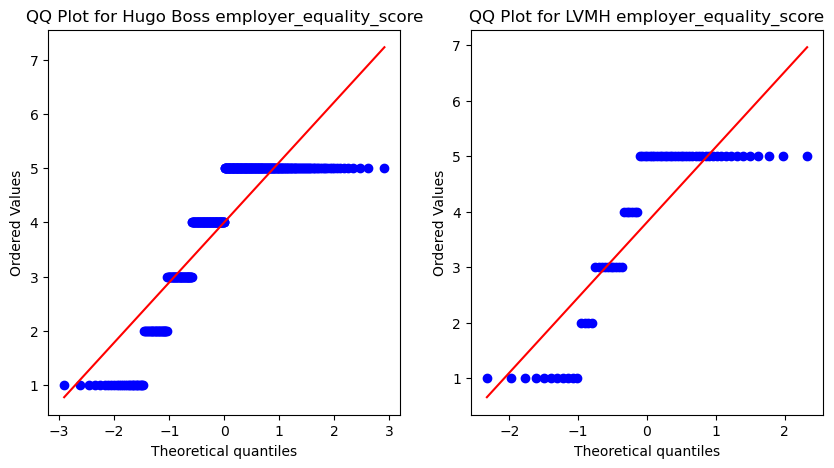

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7523549199104309, p=1.4843347209879687e-23
LVMH Salary - Shapiro-Wilk Test: Statistics=0.7667192816734314, p=4.109994566903197e-09
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 14615.5, p-value = 0.1269936181810999
Fail to reject the null hypothesis - no significant difference.


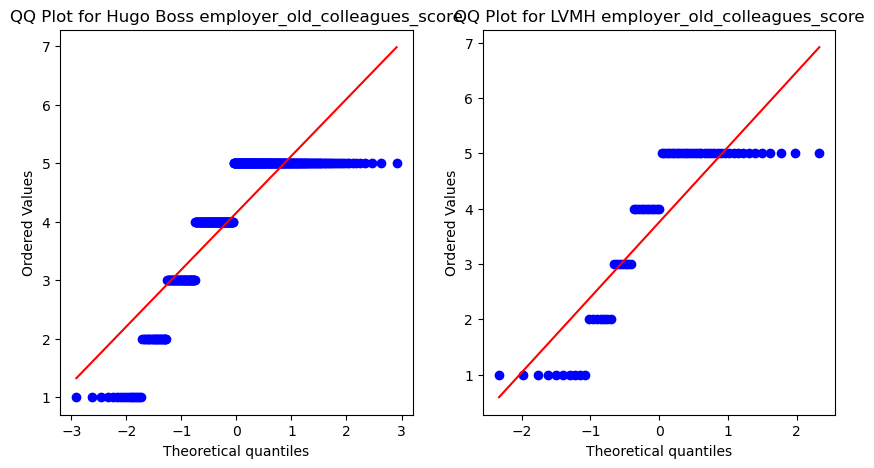

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.71913743019104, p=7.079629728715642e-25
LVMH Salary - Shapiro-Wilk Test: Statistics=0.8097155094146729, p=5.1534421174892486e-08
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 16315.0, p-value = 0.000654264464890104
Reject the null hypothesis - there is a significant difference.


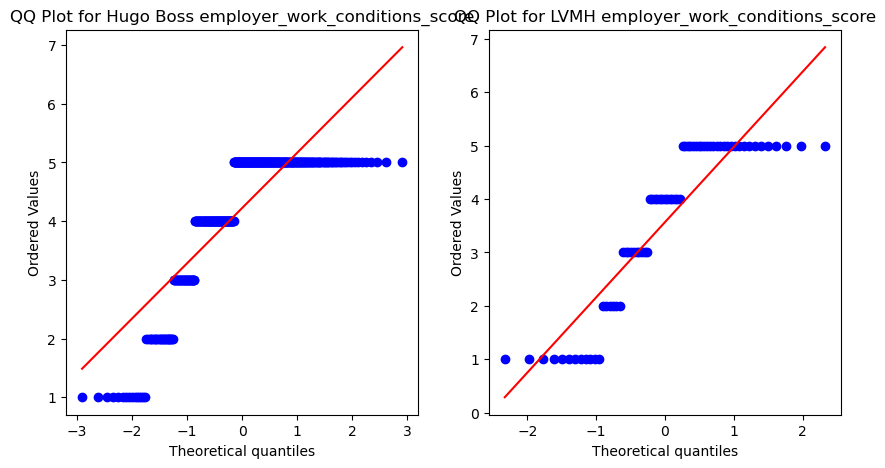

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8157459497451782, p=1.3329551897784614e-20
LVMH Salary - Shapiro-Wilk Test: Statistics=0.8775360584259033, p=6.395498985511949e-06
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 16610.0, p-value = 0.00036777516163753423
Reject the null hypothesis - there is a significant difference.


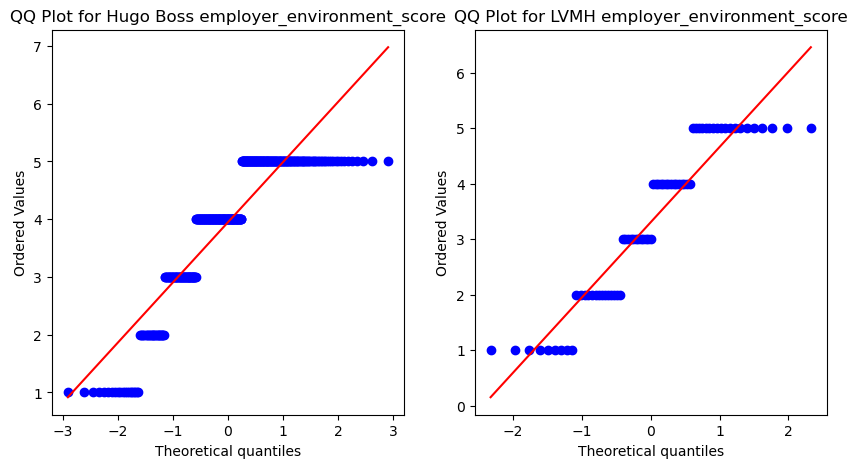

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8599081039428711, p=4.706130357786225e-18
LVMH Salary - Shapiro-Wilk Test: Statistics=0.8595094084739685, p=1.5655078868803685e-06
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 16160.5, p-value = 0.0021854043994764677
Reject the null hypothesis - there is a significant difference.


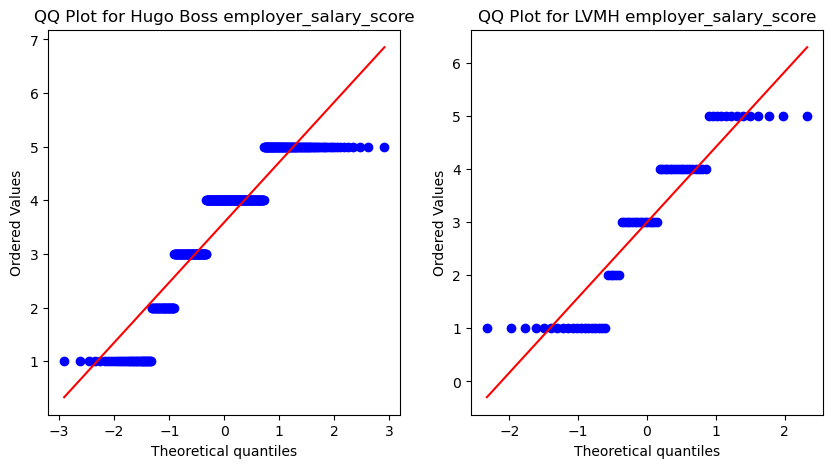

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7216575741767883, p=8.829166923428999e-25
LVMH Salary - Shapiro-Wilk Test: Statistics=0.7272403240203857, p=5.185156748410691e-10
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 13575.0, p-value = 0.6881785850416596
Fail to reject the null hypothesis - no significant difference.


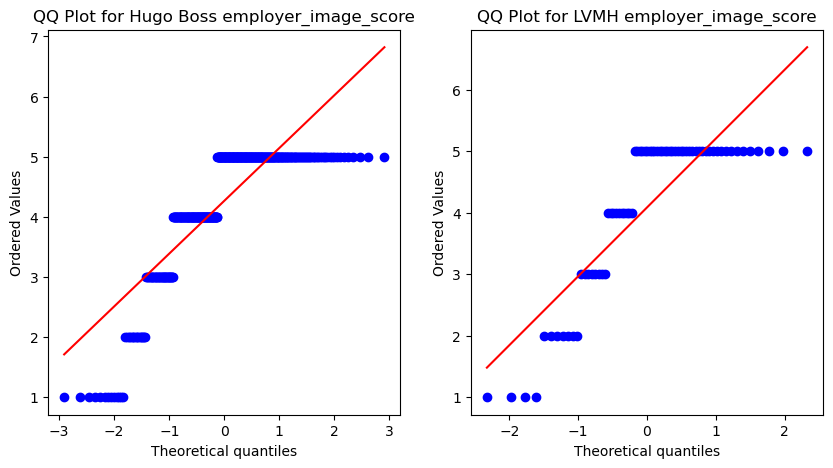

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8359922766685486, p=1.6956571832119996e-19
LVMH Salary - Shapiro-Wilk Test: Statistics=0.835344672203064, p=2.765794135939359e-07
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 14890.0, p-value = 0.08246848791570514
Fail to reject the null hypothesis - no significant difference.


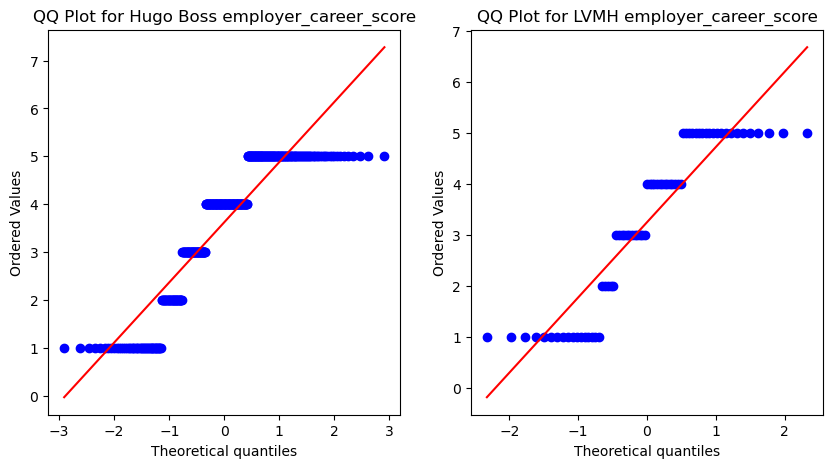

In [9]:
columns_to_average = [
    'employer_atmosphere_score', 'employer_communication_score',
    'employer_teamwork_score', 'employer_work_life_score', 'employer_leadership_score',
    'employer_tasks_score', 'employer_equality_score', 'employer_old_colleagues_score',
    'employer_work_conditions_score', 'employer_environment_score', 
    'employer_salary_score', 'employer_image_score', 'employer_career_score'
]
for score in columns_to_average:
    
    compare_scores(df, 'Hugo Boss', 'LVMH', score)

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7643433809280396, p=4.8078017703795654e-23
Bosch Salary - Shapiro-Wilk Test: Statistics=0.7712070941925049, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 862718.5, p-value = 0.9263693125426767
Fail to reject the null hypothesis - no significant difference.


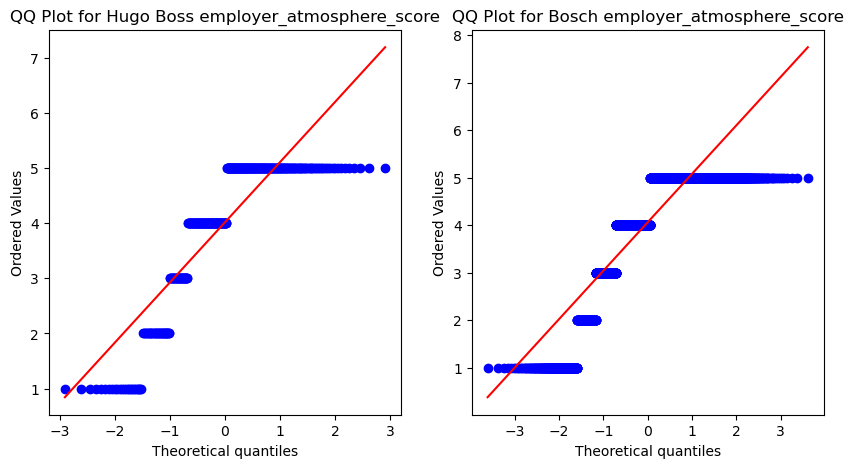

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8711384534835815, p=2.5910393749374225e-17
Bosch Salary - Shapiro-Wilk Test: Statistics=0.8452143669128418, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 772654.0, p-value = 0.00028756236990620495
Reject the null hypothesis - there is a significant difference.


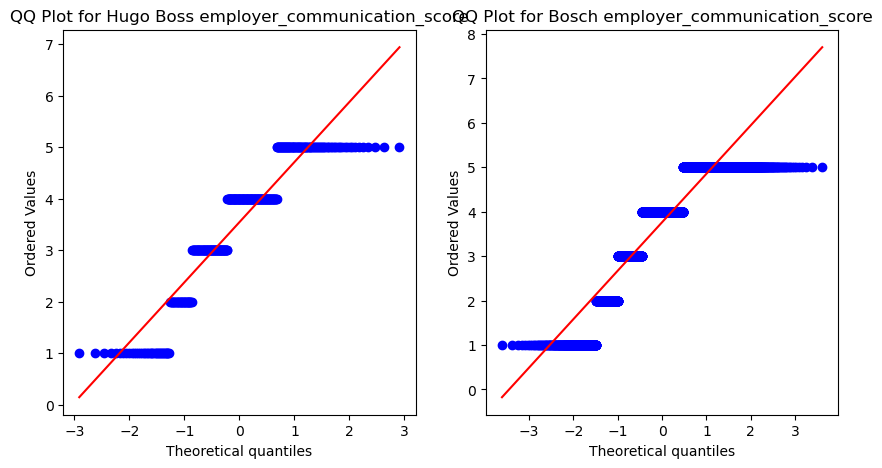

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8020877838134766, p=2.6916131995564825e-21
Bosch Salary - Shapiro-Wilk Test: Statistics=0.7476615905761719, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 769066.0, p-value = 8.601680922630268e-05
Reject the null hypothesis - there is a significant difference.


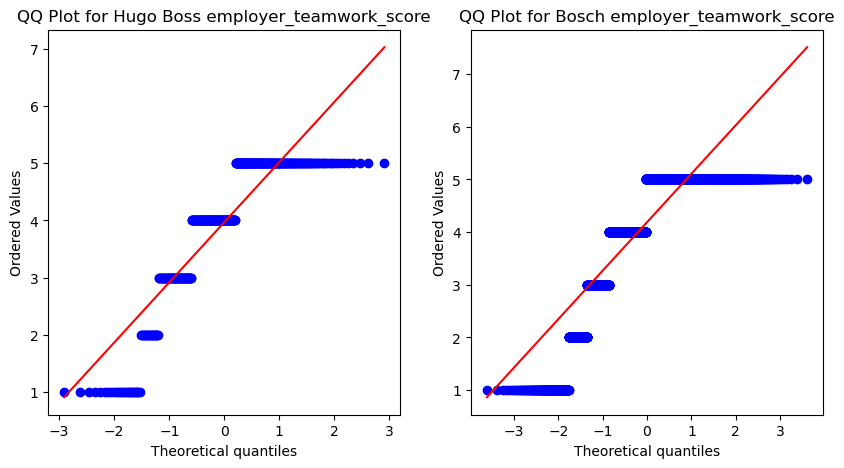

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7884693145751953, p=5.919580930777753e-22
Bosch Salary - Shapiro-Wilk Test: Statistics=0.7947584390640259, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 867872.5, p-value = 0.9085054264136906
Fail to reject the null hypothesis - no significant difference.


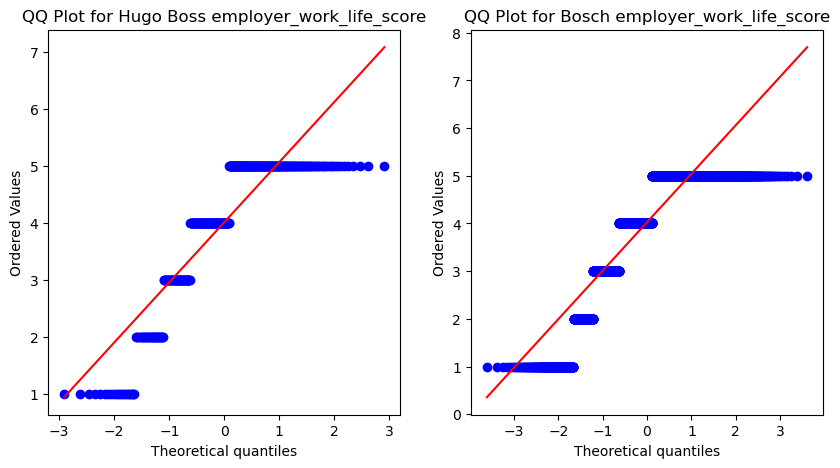

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8217376470565796, p=2.765989540153036e-20
Bosch Salary - Shapiro-Wilk Test: Statistics=0.7954038977622986, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 779263.5, p-value = 0.0006902515152465466
Reject the null hypothesis - there is a significant difference.


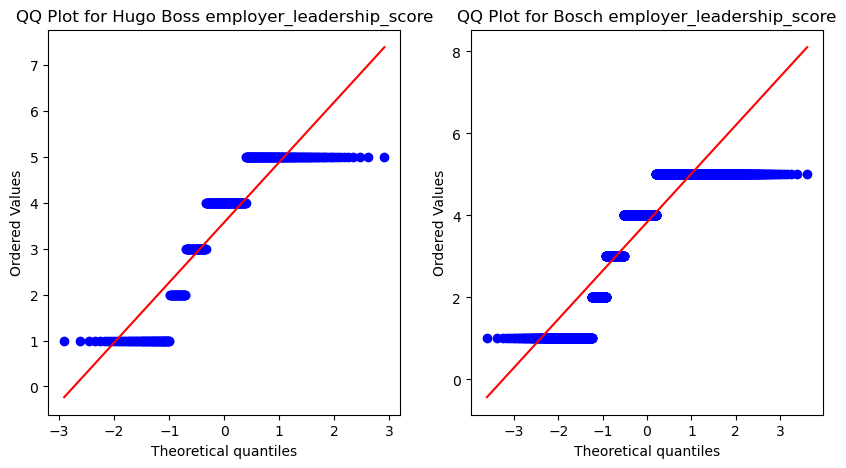

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7707819938659668, p=9.210945033195891e-23
Bosch Salary - Shapiro-Wilk Test: Statistics=0.7706471085548401, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 886505.0, p-value = 0.3840175330012052
Fail to reject the null hypothesis - no significant difference.


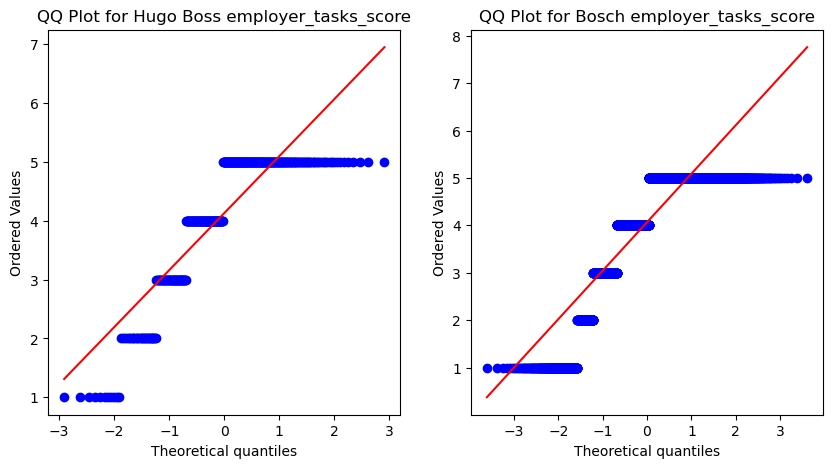

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7691415548324585, p=7.794634892470398e-23
Bosch Salary - Shapiro-Wilk Test: Statistics=0.7144655585289001, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 791348.5, p-value = 0.0020795904321315607
Reject the null hypothesis - there is a significant difference.


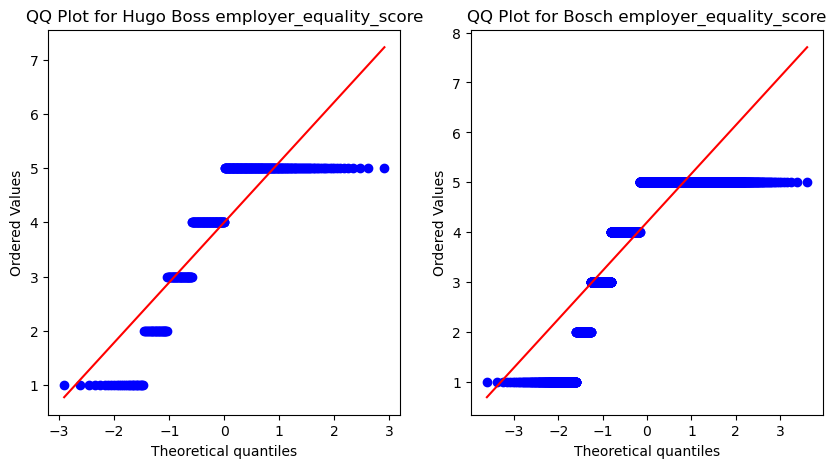

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7523549199104309, p=1.4843347209879687e-23
Bosch Salary - Shapiro-Wilk Test: Statistics=0.6990151405334473, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 810349.0, p-value = 0.021184431634067417
Reject the null hypothesis - there is a significant difference.


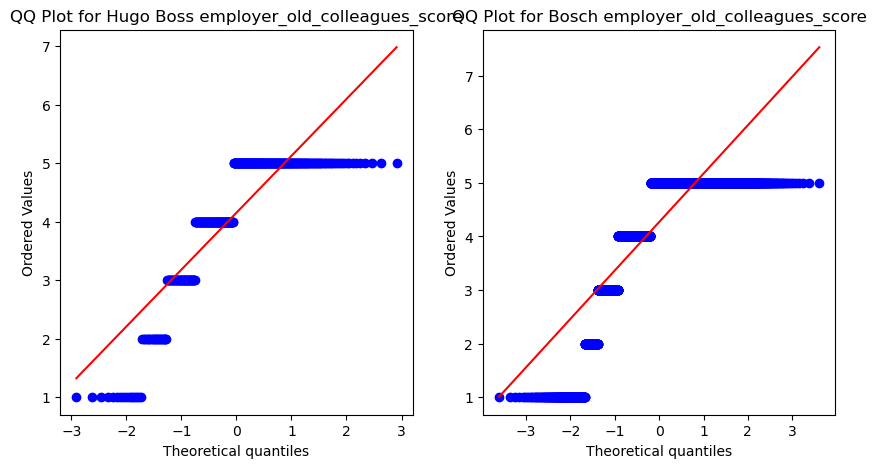

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.71913743019104, p=7.079629728715642e-25
Bosch Salary - Shapiro-Wilk Test: Statistics=0.7725754976272583, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 935555.5, p-value = 0.004226344657543559
Reject the null hypothesis - there is a significant difference.


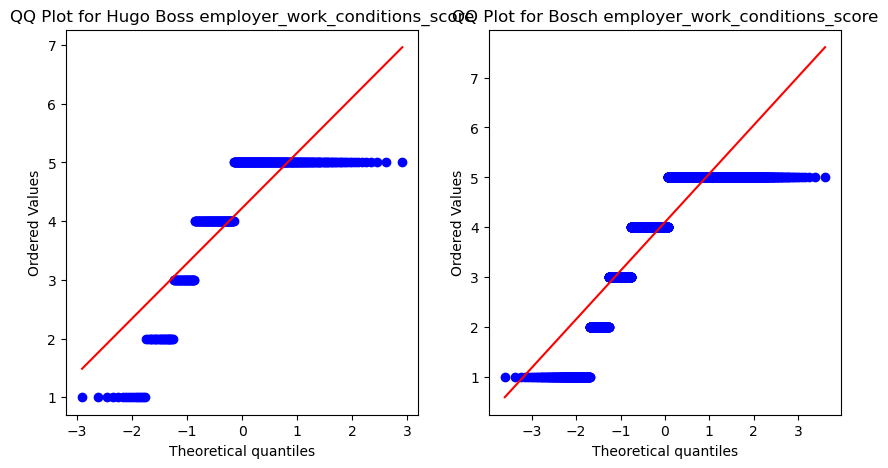

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8157459497451782, p=1.3329551897784614e-20
Bosch Salary - Shapiro-Wilk Test: Statistics=0.7792572975158691, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 802297.5, p-value = 0.011483677222120608
Reject the null hypothesis - there is a significant difference.


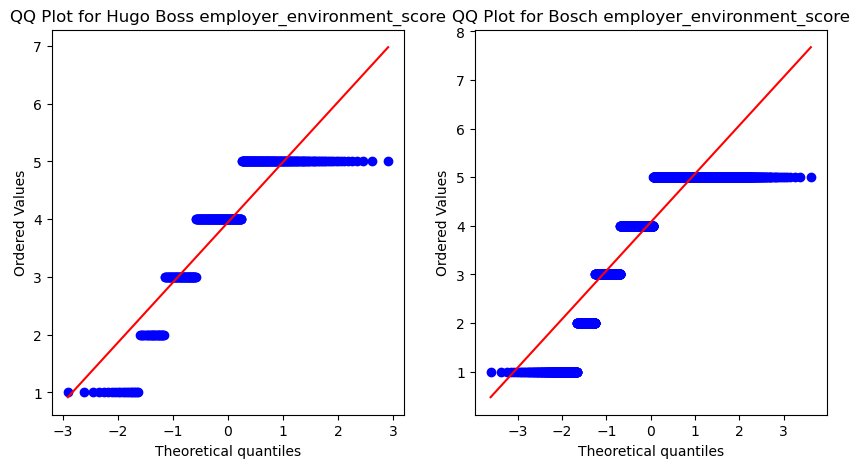

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8599081039428711, p=4.706130357786225e-18
Bosch Salary - Shapiro-Wilk Test: Statistics=0.7763087153434753, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 643810.0, p-value = 6.729995674734854e-19
Reject the null hypothesis - there is a significant difference.


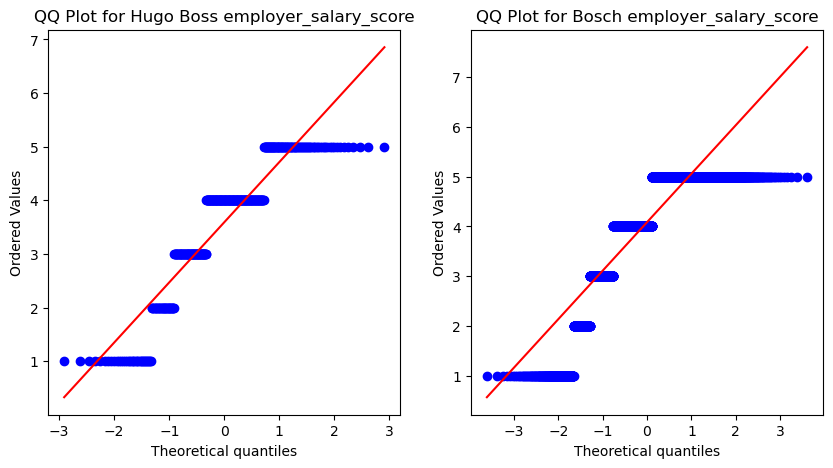

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7216575741767883, p=8.829166923428999e-25
Bosch Salary - Shapiro-Wilk Test: Statistics=0.7313395738601685, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 885963.0, p-value = 0.3850817945771696
Fail to reject the null hypothesis - no significant difference.


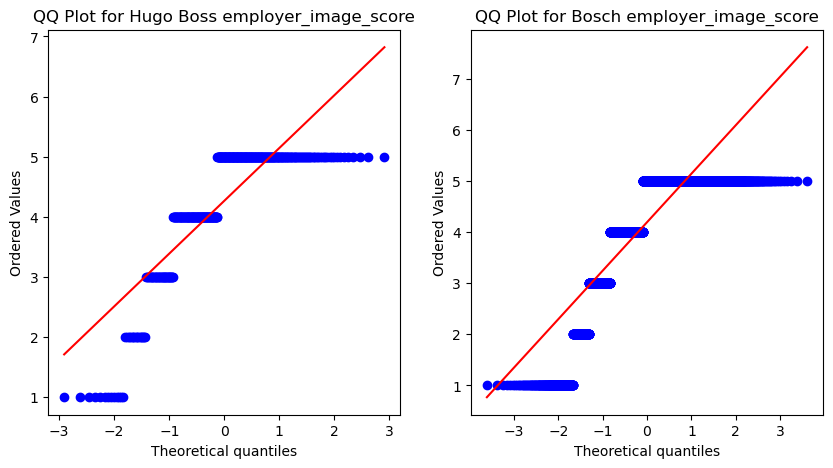

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8359922766685486, p=1.6956571832119996e-19
Bosch Salary - Shapiro-Wilk Test: Statistics=0.8234663605690002, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 811948.5, p-value = 0.03711565472164218
Reject the null hypothesis - there is a significant difference.


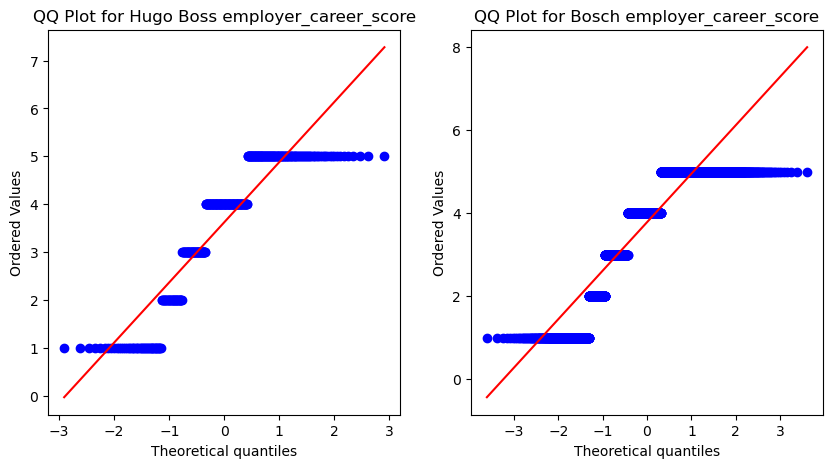

In [10]:
for score in columns_to_average:
    
    compare_scores(df, 'Hugo Boss', 'Bosch', score)

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7643433809280396, p=4.8078017703795654e-23
Porsche Salary - Shapiro-Wilk Test: Statistics=0.7182319164276123, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 512006.0, p-value = 0.01400884546815647
Reject the null hypothesis - there is a significant difference.


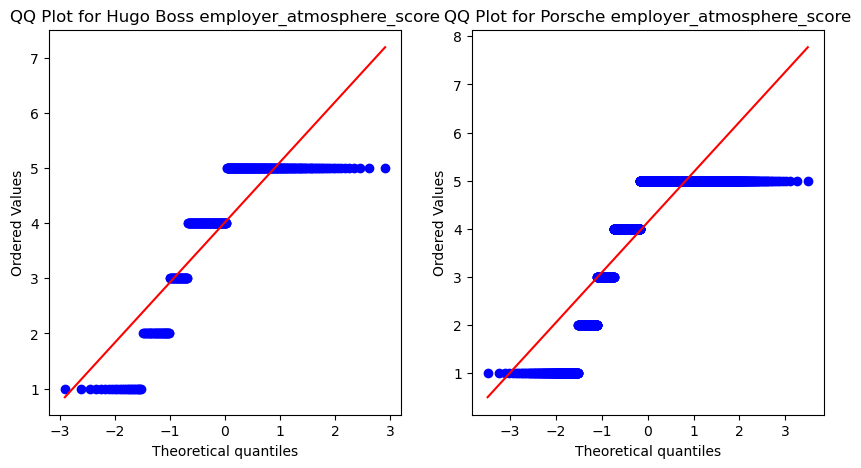

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8711384534835815, p=2.5910393749374225e-17
Porsche Salary - Shapiro-Wilk Test: Statistics=0.814258337020874, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 466771.0, p-value = 4.25351649006031e-07
Reject the null hypothesis - there is a significant difference.


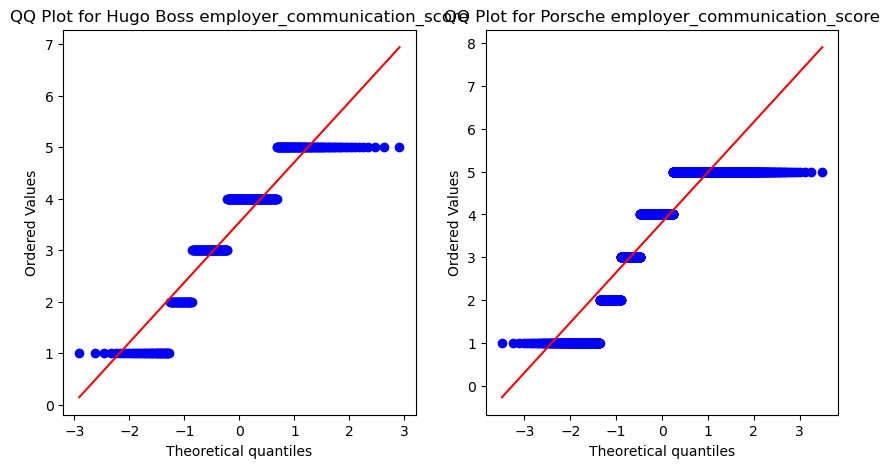

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8020877838134766, p=2.6916131995564825e-21
Porsche Salary - Shapiro-Wilk Test: Statistics=0.7035449147224426, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 466127.0, p-value = 5.983095628014191e-08
Reject the null hypothesis - there is a significant difference.


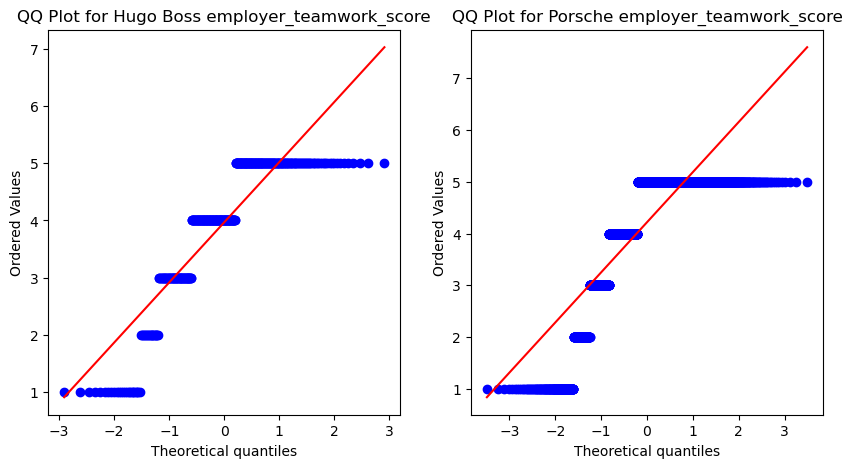

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7884693145751953, p=5.919580930777753e-22
Porsche Salary - Shapiro-Wilk Test: Statistics=0.8132076263427734, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 591710.5, p-value = 0.011908642155130631
Reject the null hypothesis - there is a significant difference.


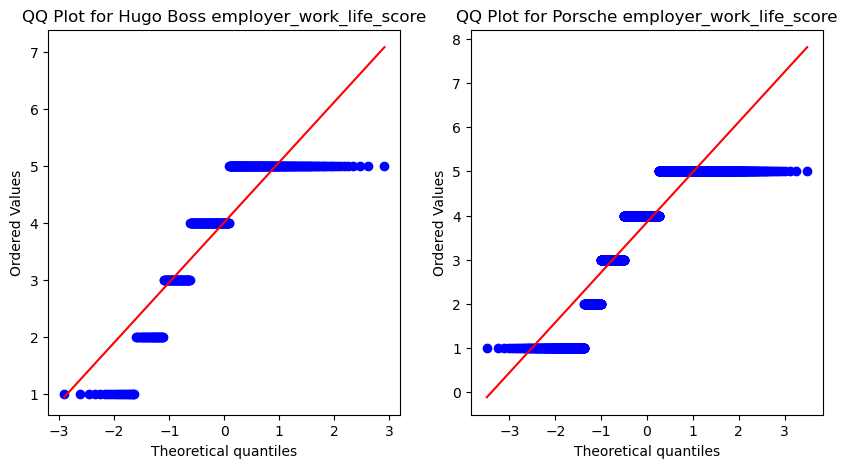

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8217376470565796, p=2.765989540153036e-20
Porsche Salary - Shapiro-Wilk Test: Statistics=0.7486642599105835, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 469327.0, p-value = 5.186029144992994e-07
Reject the null hypothesis - there is a significant difference.


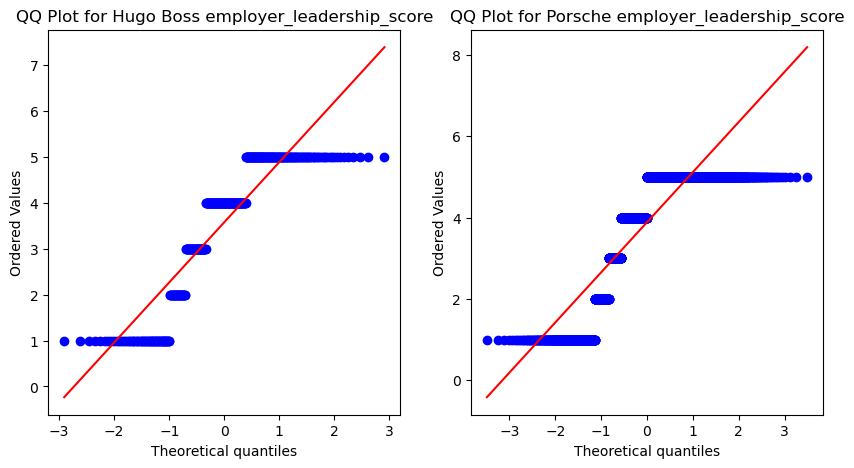

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7707819938659668, p=9.210945033195891e-23
Porsche Salary - Shapiro-Wilk Test: Statistics=0.7359359860420227, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 538045.5, p-value = 0.43362553172789564
Fail to reject the null hypothesis - no significant difference.


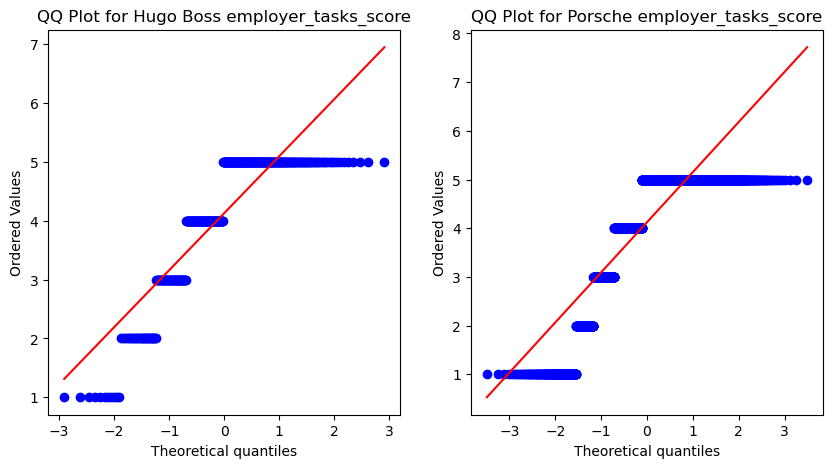

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7691415548324585, p=7.794634892470398e-23
Porsche Salary - Shapiro-Wilk Test: Statistics=0.7026997804641724, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 504349.5, p-value = 0.002936695806653385
Reject the null hypothesis - there is a significant difference.


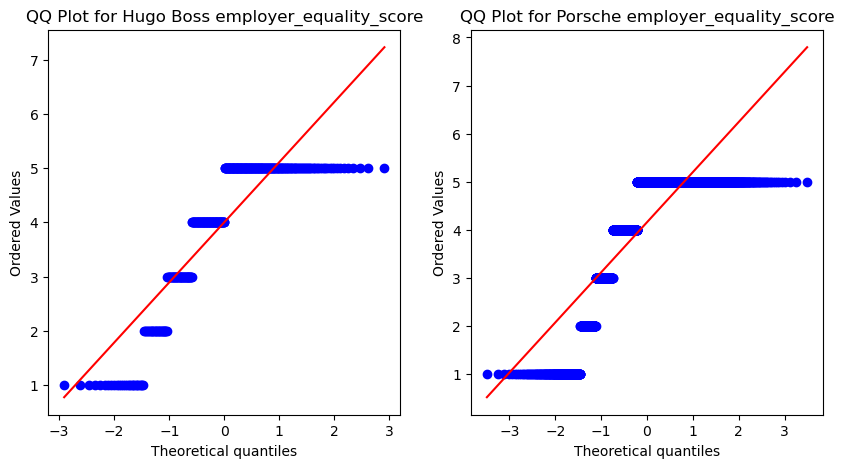

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7523549199104309, p=1.4843347209879687e-23
Porsche Salary - Shapiro-Wilk Test: Statistics=0.6581549644470215, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 490827.5, p-value = 7.10819658759957e-05
Reject the null hypothesis - there is a significant difference.


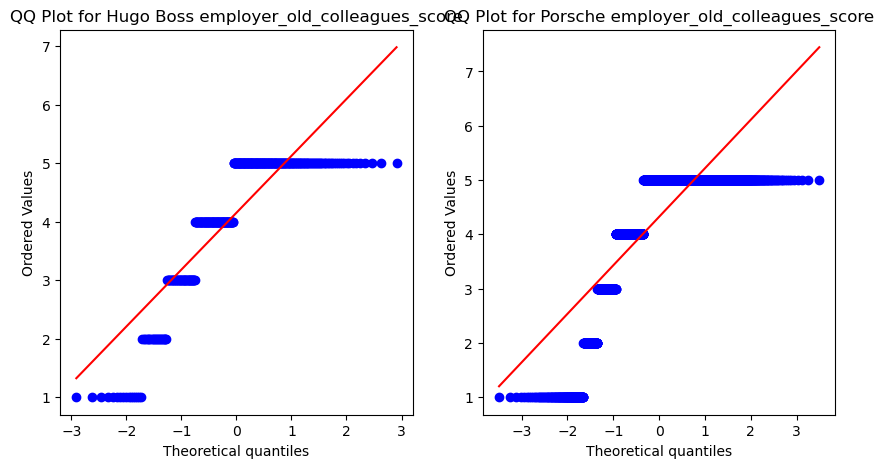

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.71913743019104, p=7.079629728715642e-25
Porsche Salary - Shapiro-Wilk Test: Statistics=0.7229570746421814, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 559243.5, p-value = 0.5695892699305679
Fail to reject the null hypothesis - no significant difference.


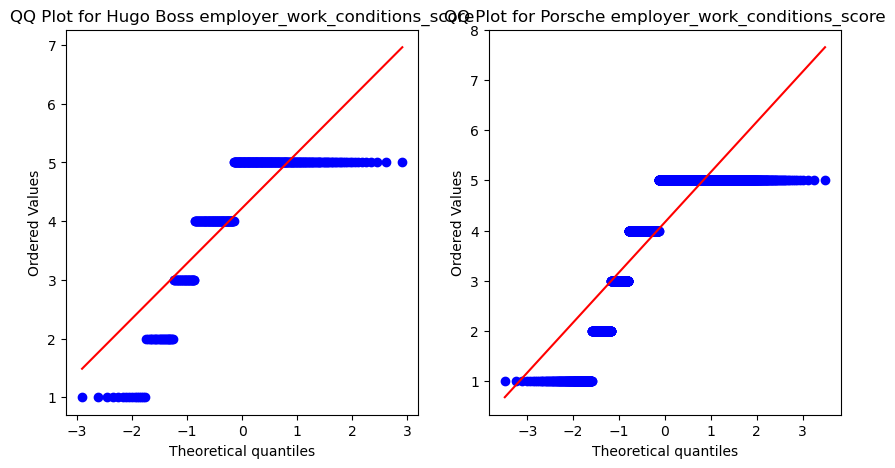

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8157459497451782, p=1.3329551897784614e-20
Porsche Salary - Shapiro-Wilk Test: Statistics=0.7856439352035522, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 534326.0, p-value = 0.3240202486170968
Fail to reject the null hypothesis - no significant difference.


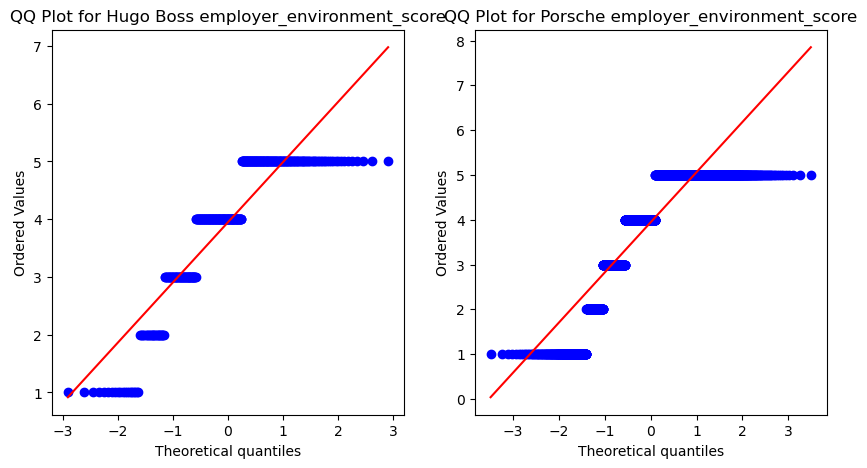

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8599081039428711, p=4.706130357786225e-18
Porsche Salary - Shapiro-Wilk Test: Statistics=0.7687265872955322, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 418361.5, p-value = 4.305132770474737e-16
Reject the null hypothesis - there is a significant difference.


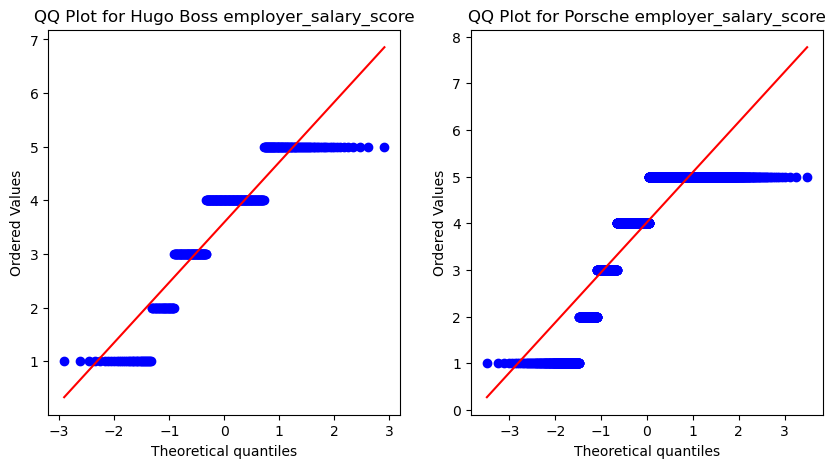

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7216575741767883, p=8.829166923428999e-25
Porsche Salary - Shapiro-Wilk Test: Statistics=0.6552320122718811, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 508900.5, p-value = 0.005192950605700008
Reject the null hypothesis - there is a significant difference.


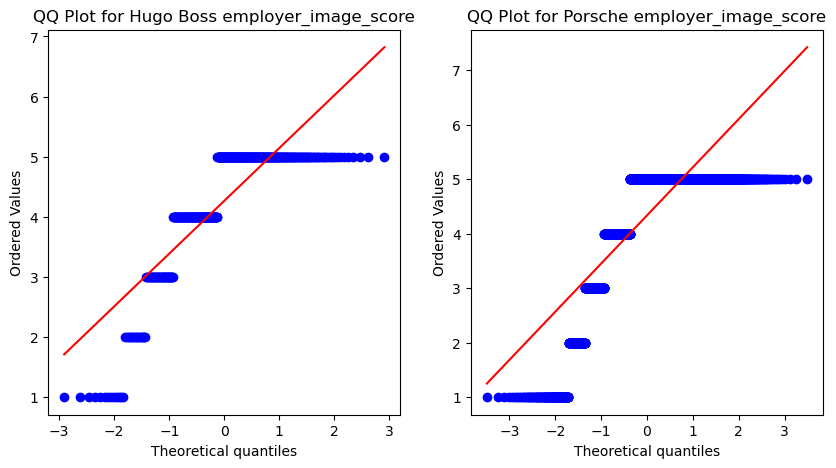

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8359922766685486, p=1.6956571832119996e-19
Porsche Salary - Shapiro-Wilk Test: Statistics=0.8020764589309692, p=0.0
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 503073.0, p-value = 0.004046740078437516
Reject the null hypothesis - there is a significant difference.


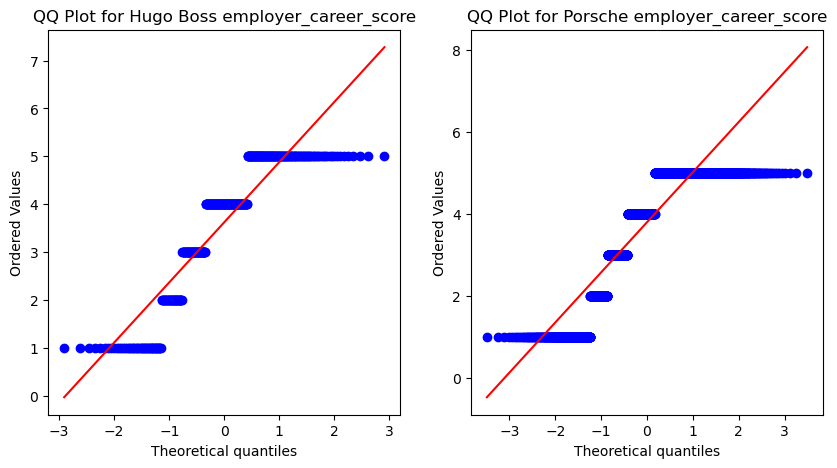

In [11]:
for score in columns_to_average:
    
    compare_scores(df, 'Hugo Boss', 'Porsche', score)

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7643433809280396, p=4.8078017703795654e-23
Mercedes-Benz Salary - Shapiro-Wilk Test: Statistics=0.7842583656311035, p=2.439414558379171e-38
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 254662.0, p-value = 0.46536316292689084
Fail to reject the null hypothesis - no significant difference.


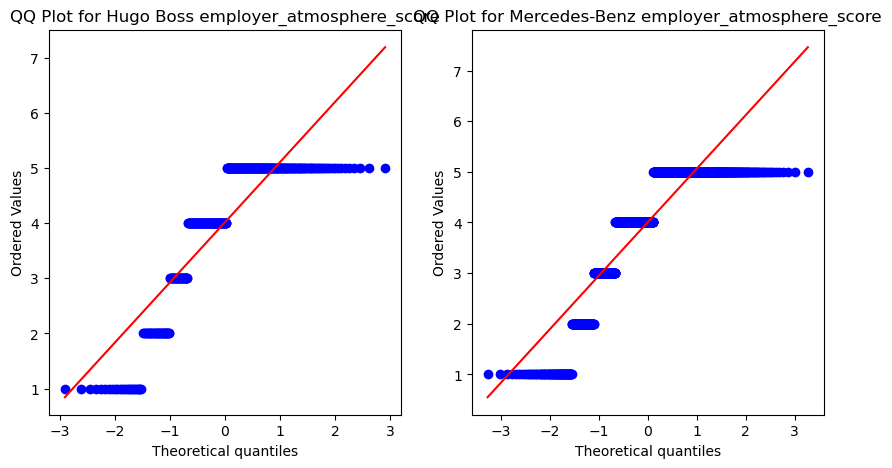

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8711384534835815, p=2.5910393749374225e-17
Mercedes-Benz Salary - Shapiro-Wilk Test: Statistics=0.8481396436691284, p=1.4802700976187592e-33
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 226408.5, p-value = 0.005138828651958847
Reject the null hypothesis - there is a significant difference.


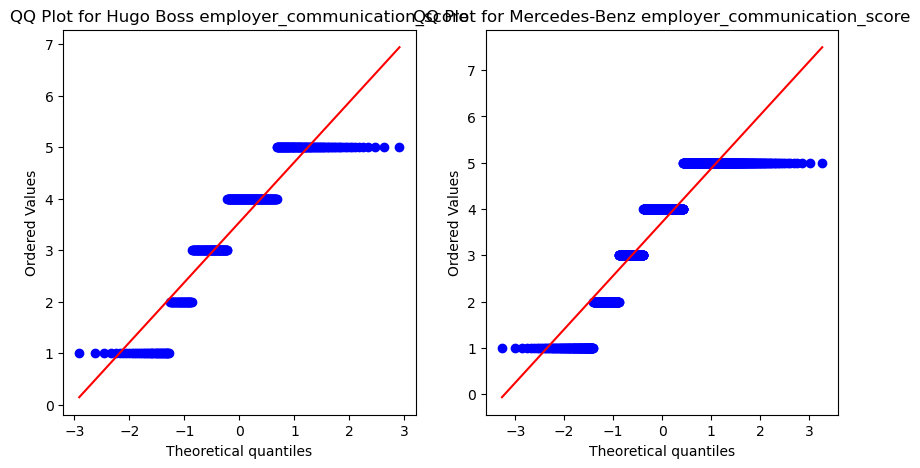

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8020877838134766, p=2.6916131995564825e-21
Mercedes-Benz Salary - Shapiro-Wilk Test: Statistics=0.7526935935020447, p=2.7364836671027893e-40
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 222533.5, p-value = 0.000629595019326122
Reject the null hypothesis - there is a significant difference.


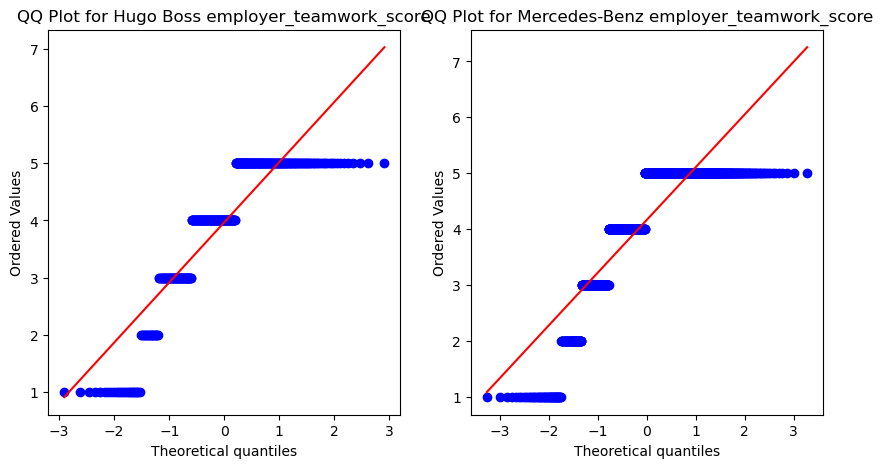

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7884693145751953, p=5.919580930777753e-22
Mercedes-Benz Salary - Shapiro-Wilk Test: Statistics=0.7982192039489746, p=2.1101176028458707e-37
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 252973.0, p-value = 0.6086770678512259
Fail to reject the null hypothesis - no significant difference.


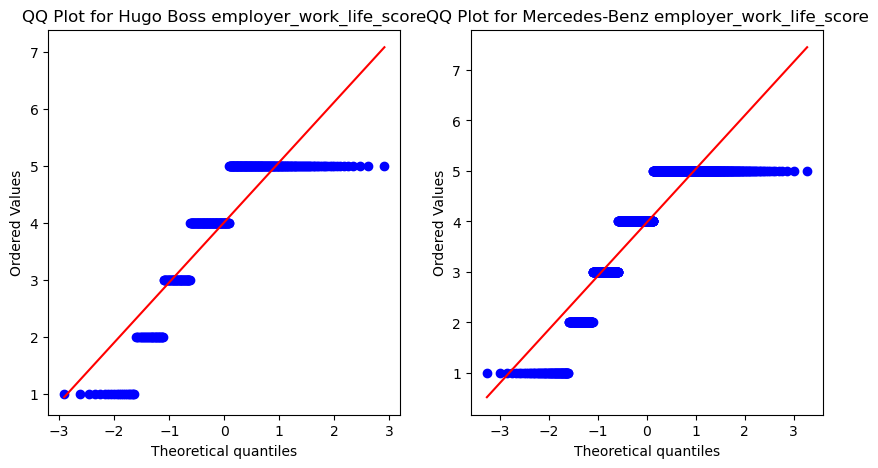

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8217376470565796, p=2.765989540153036e-20
Mercedes-Benz Salary - Shapiro-Wilk Test: Statistics=0.7956259250640869, p=1.400826955417541e-37
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 226351.0, p-value = 0.004563750346202915
Reject the null hypothesis - there is a significant difference.


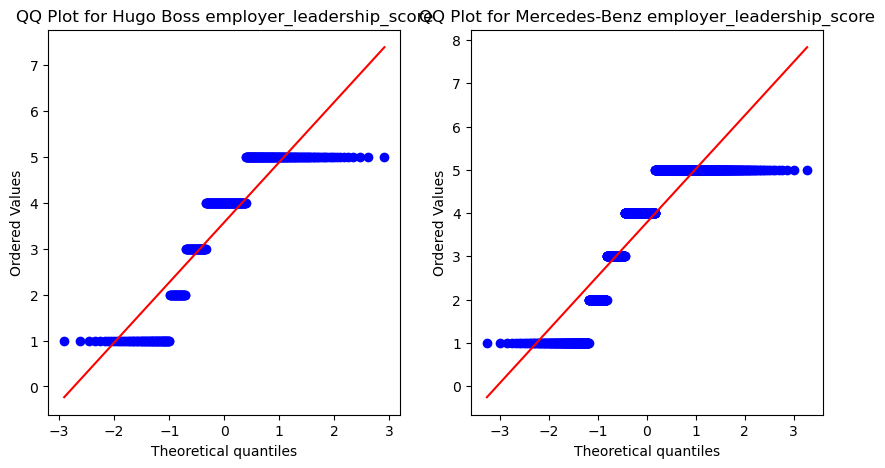

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7707819938659668, p=9.210945033195891e-23
Mercedes-Benz Salary - Shapiro-Wilk Test: Statistics=0.7902949452400208, p=6.113046281026625e-38
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 267952.5, p-value = 0.0153393489466127
Reject the null hypothesis - there is a significant difference.


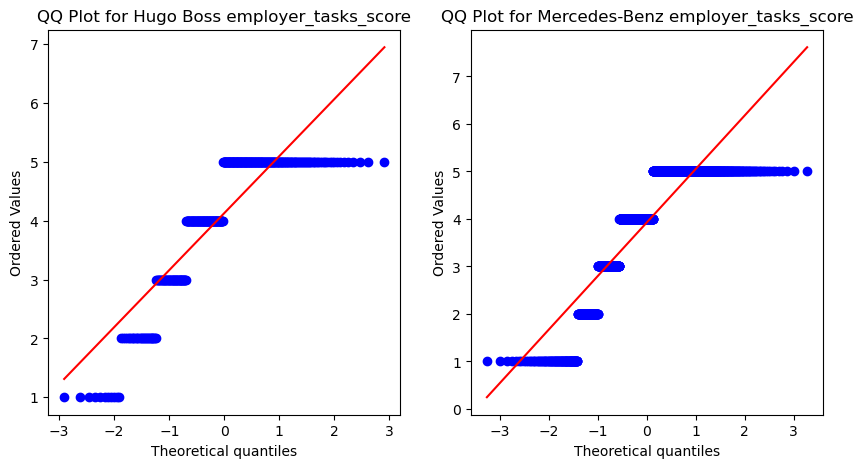

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7691415548324585, p=7.794634892470398e-23
Mercedes-Benz Salary - Shapiro-Wilk Test: Statistics=0.7283852696418762, p=1.1721861654077095e-41
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 232220.0, p-value = 0.027704650730396678
Reject the null hypothesis - there is a significant difference.


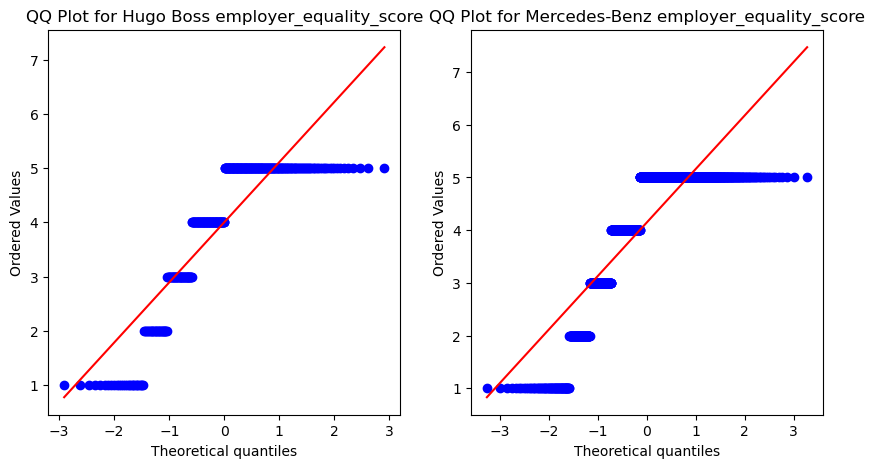

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7523549199104309, p=1.4843347209879687e-23
Mercedes-Benz Salary - Shapiro-Wilk Test: Statistics=0.6999677419662476, p=3.8956097308229915e-43
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 234106.0, p-value = 0.0476407939631765
Reject the null hypothesis - there is a significant difference.


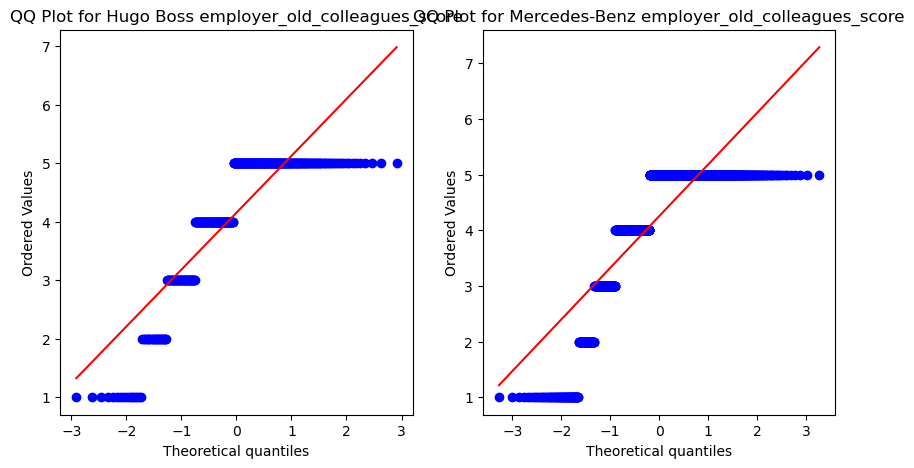

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.71913743019104, p=7.079629728715642e-25
Mercedes-Benz Salary - Shapiro-Wilk Test: Statistics=0.7609150409698486, p=8.408897811735719e-40
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 264431.5, p-value = 0.04376089766600403
Reject the null hypothesis - there is a significant difference.


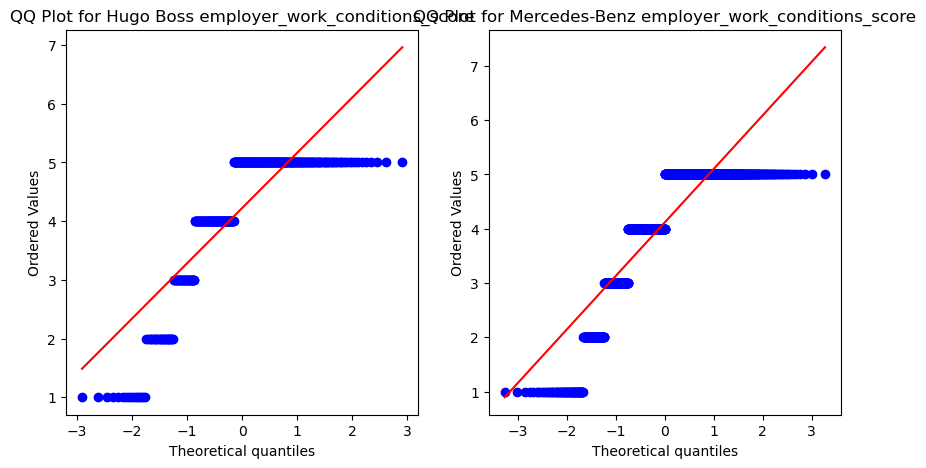

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8157459497451782, p=1.3329551897784614e-20
Mercedes-Benz Salary - Shapiro-Wilk Test: Statistics=0.8170643448829651, p=4.7396052041778526e-36
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 251388.0, p-value = 0.7587337019881419
Fail to reject the null hypothesis - no significant difference.


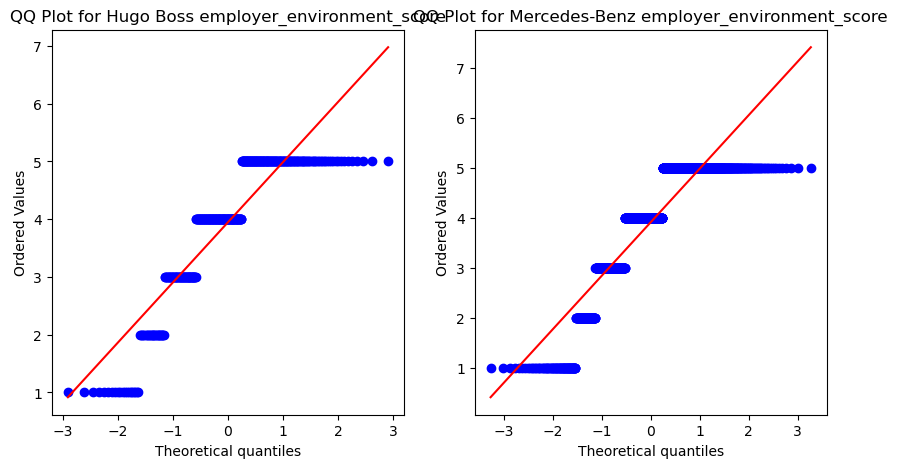

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8599081039428711, p=4.706130357786225e-18
Mercedes-Benz Salary - Shapiro-Wilk Test: Statistics=0.8159170746803284, p=3.893532311454824e-36
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 206809.5, p-value = 1.2921744061489207e-07
Reject the null hypothesis - there is a significant difference.


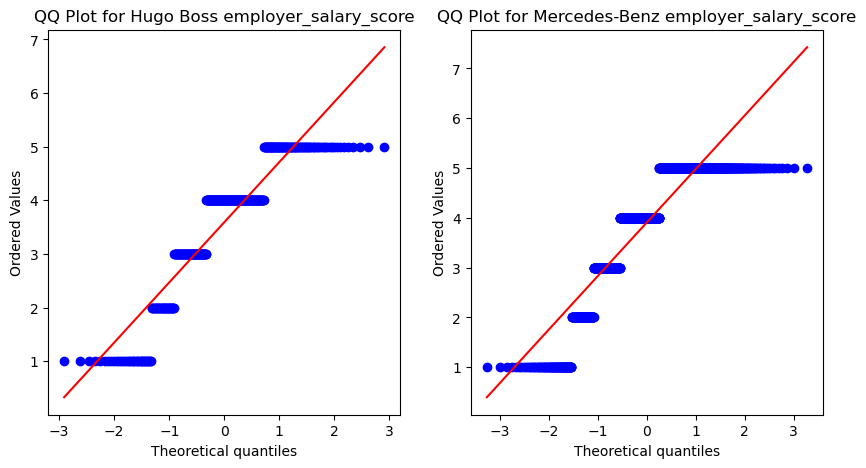

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.7216575741767883, p=8.829166923428999e-25
Mercedes-Benz Salary - Shapiro-Wilk Test: Statistics=0.7244552373886108, p=7.198470211236585e-42
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 255938.5, p-value = 0.35690285433736046
Fail to reject the null hypothesis - no significant difference.


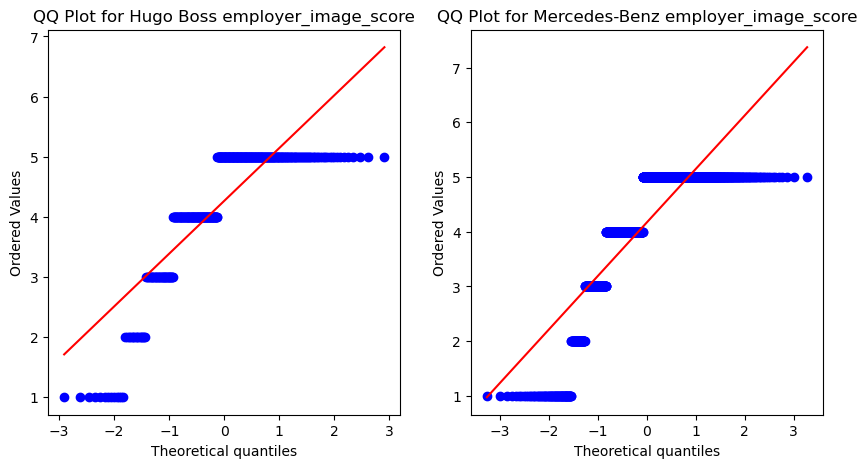

Hugo Boss Salary - Shapiro-Wilk Test: Statistics=0.8359922766685486, p=1.6956571832119996e-19
Mercedes-Benz Salary - Shapiro-Wilk Test: Statistics=0.843114972114563, p=5.507050984470776e-34
At least one sample is not normally distributed, using Mann-Whitney U Test.
Mann-Whitney U Test Results: U-statistic = 248986.0, p-value = 0.9964889090488513
Fail to reject the null hypothesis - no significant difference.


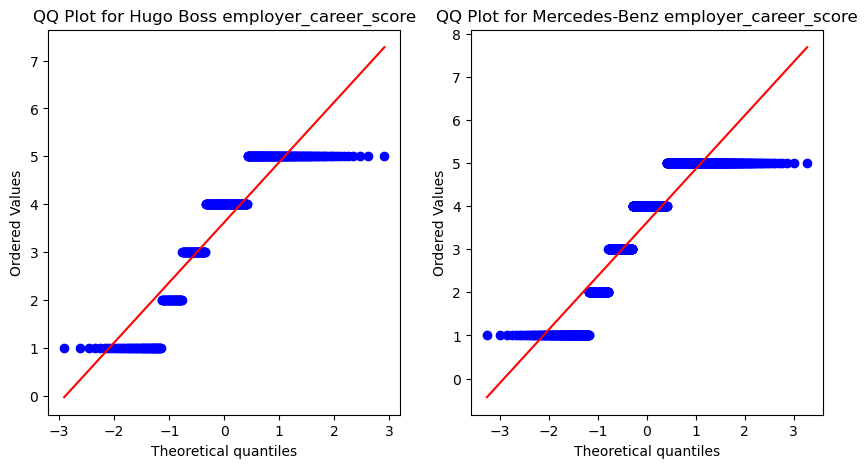

In [12]:
for score in columns_to_average:
    
    compare_scores(df, 'Hugo Boss', 'Mercedes-Benz', score)